In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 데이터 로드
data = pd.read_csv('../00_Data/Integrated_data/Fully_integrated_data.csv')

In [8]:
data

,Unnamed: 0,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,4.446537e+07,44.700000,4.198132e+07,13.600000,90.448000,1814.57,1611.14,18409608.0
1,1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,4.426952e+07,43.775943,4.179913e+07,13.521635,90.397806,1815.24,1611.79,18398782.0
2,2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,4.407367e+07,42.851885,4.161694e+07,13.443269,90.347613,1816.15,1612.85,18387956.0
3,3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,4.387783e+07,41.927828,4.143475e+07,13.364904,90.297419,1817.48,1614.02,18377130.0
4,4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,4.368198e+07,41.003771,4.125256e+07,13.286539,90.247226,1818.53,1615.00,18366304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,4741,2023-12-27,10276694.0,3.50,1324.077419,580296.0,1.4,5.717900e+07,5.450600,5.290244e+07,-11.037139,109.631118,1583.53,1501.33,25949201.0
4742,4742,2023-12-28,10408581.0,3.50,1325.580645,580296.0,1.4,5.724470e+07,5.375500,5.293918e+07,-11.014283,109.631118,1582.63,1500.25,25949201.0
4743,4743,2023-12-29,11018411.0,3.50,1327.083871,580296.0,1.4,5.731039e+07,5.300400,5.297591e+07,-10.991426,109.631118,1581.89,1499.03,25949201.0
4744,4744,2023-12-30,8958402.0,3.50,1328.587097,580296.0,1.4,5.737609e+07,5.225300,5.301265e+07,-10.968570,109.631118,1581.22,1498.23,25949201.0


In [9]:
# Traffic rate 결측치 제거
data = data.dropna(subset=['Total Traffic Volume'])

In [11]:
# Traffic rate를 사분위수로 범주화
data['Total_Traffic_Volume_cat'] = pd.qcut(data['Total Traffic Volume'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 분석에 사용할 특성 선택 및 스케일링
features = data[['number of car ownership', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:

# k-NN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Total_Traffic_Volume_cat'], test_size=0.2, random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, features_scaled, data['Total_Traffic_Volume_cat'], cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Train the model on the entire dataset and evaluate on a separate test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Total_Traffic_Volume_cat'], test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# 모델 평가
print(classification_report(y_test, predictions))

Cross-validation scores: [0.65368421 0.63224447 0.6459431  0.63224447 0.64805058]
Mean cross-validation accuracy: 0.6424333647606899
              precision    recall  f1-score   support

        High       0.52      0.60      0.56       216
         Low       0.70      0.77      0.73       239
      Medium       0.53      0.46      0.49       247
   Very High       0.85      0.79      0.82       248

    accuracy                           0.65       950
   macro avg       0.65      0.65      0.65       950
weighted avg       0.66      0.65      0.65       950



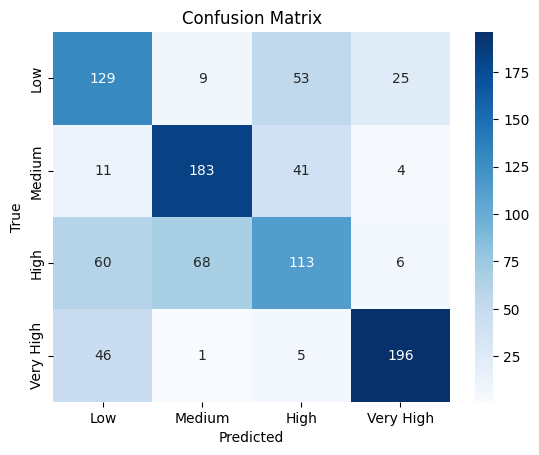

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Traffic rate를 삼분위로 범주화
data['Traffic_rate_tertile'] = pd.qcut(data['Total Traffic Volume'], 3, labels=['Low', 'Medium', 'High'])

# 특성 선택 및 스케일링
features = data[['number of car ownership', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_tertile'], test_size=0.2, random_state=42)

# k-NN 모델 생성 및 훈련
knn_tertile = KNeighborsClassifier(n_neighbors=5)
knn_tertile.fit(X_train, y_train)

# 모델 평가
predictions_tertile = knn_tertile.predict(X_test)
print("Classification Report for Tertile:")
print(classification_report(y_test, predictions_tertile))

Classification Report for Tertile:
              precision    recall  f1-score   support

        High       0.79      0.89      0.84       300
         Low       0.76      0.78      0.77       334
      Medium       0.66      0.57      0.61       316

    accuracy                           0.74       950
   macro avg       0.74      0.74      0.74       950
weighted avg       0.74      0.74      0.74       950



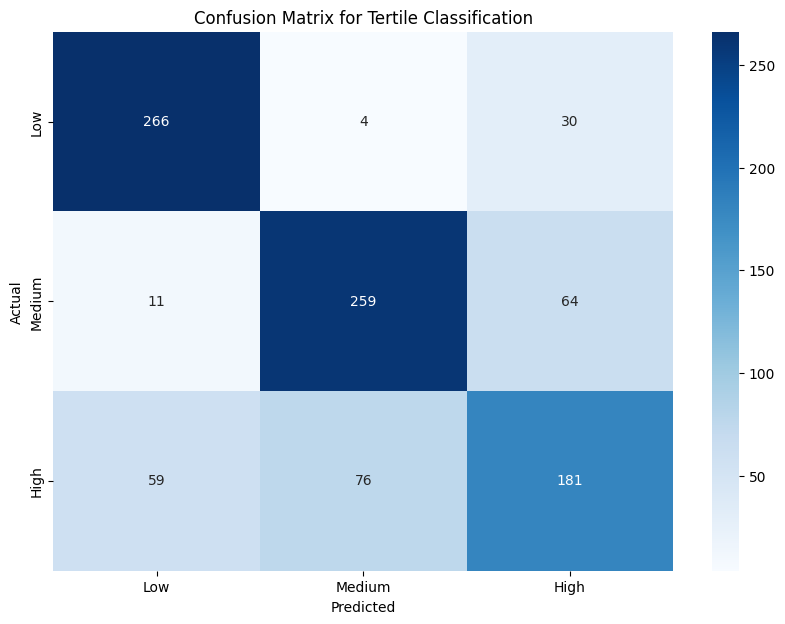

In [17]:
# 혼동 행렬 시각화
conf_matrix_tertile = confusion_matrix(y_test, predictions_tertile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tertile, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tertile Classification')
plt.show()

In [20]:
# Traffic rate를 삼분위수로 범주화
data['Traffic_rate_tertile'] = pd.qcut(data['Total Traffic Volume'], 3, labels=['Low', 'Medium', 'High'])

# 특성 선택 및 스케일링
features = data[['number of car ownership', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# k-NN 모델 생성
knn_tertile = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation for tertile classification
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_tertile = cross_val_score(knn_tertile, features_scaled, data['Traffic_rate_tertile'], cv=kf, scoring='accuracy')

# Print cross-validation scores for tertile classification
print(f'Cross-validation scores for Tertile Classification: {cv_scores_tertile}')
print(f'Mean cross-validation accuracy for Tertile Classification: {cv_scores_tertile.mean()}')

# Train the model on the entire dataset and evaluate on a separate test set for tertile classification
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_tertile'], test_size=0.2, random_state=42)
knn_tertile.fit(X_train, y_train)
predictions_tertile = knn_tertile.predict(X_test)

# 모델 평가
print("Classification Report for Tertile:")
print(classification_report(y_test, predictions_tertile))

Cross-validation scores for Tertile Classification: [0.74315789 0.73656481 0.73656481 0.74499473 0.73972603]
Mean cross-validation accuracy for Tertile Classification: 0.740201652709223
Classification Report for Tertile:
              precision    recall  f1-score   support

        High       0.79      0.89      0.84       300
         Low       0.76      0.78      0.77       334
      Medium       0.66      0.57      0.61       316

    accuracy                           0.74       950
   macro avg       0.74      0.74      0.74       950
weighted avg       0.74      0.74      0.74       950



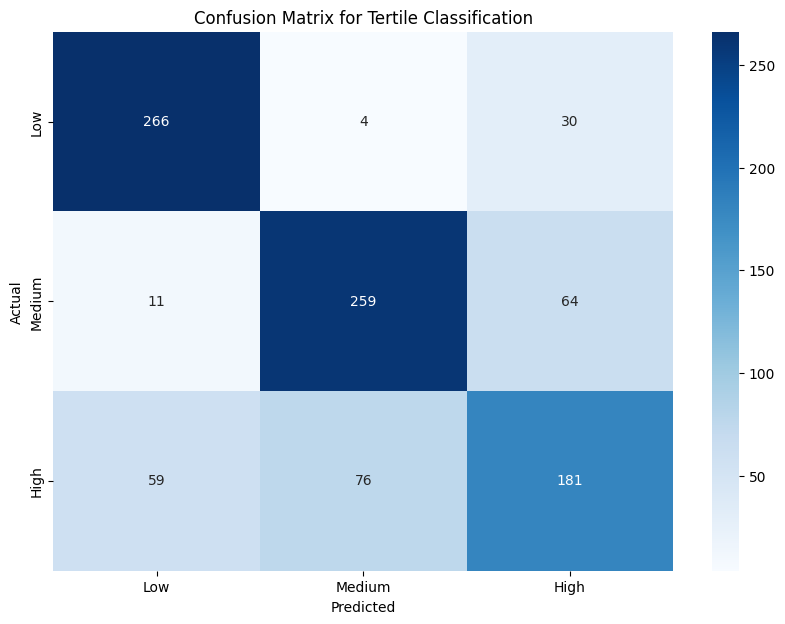

In [21]:
# 혼동 행렬 시각화
conf_matrix_tertile = confusion_matrix(y_test, predictions_tertile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tertile, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tertile Classification')
plt.show()

In [23]:
# Traffic rate를 오분위수로 범주화
data['Traffic_rate_quintile'] = pd.qcut(data['Total Traffic Volume'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# k-NN 모델 생성
knn_quintile = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation for quintile classification
cv_scores_quintile = cross_val_score(knn_quintile, features_scaled, data['Traffic_rate_quintile'], cv=kf, scoring='accuracy')

# Print cross-validation scores for quintile classification
print(f'Cross-validation scores for Quintile Classification: {cv_scores_quintile}')
print(f'Mean cross-validation accuracy for Quintile Classification: {cv_scores_quintile.mean()}')

# Train the model on the entire dataset and evaluate on a separate test set for quintile classification
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(features_scaled, data['Traffic_rate_quintile'], test_size=0.2, random_state=42)
knn_quintile.fit(X_train_q, y_train_q)
predictions_quintile = knn_quintile.predict(X_test_q)

# 모델 평가
print("Classification Report for Quintile:")
print(classification_report(y_test_q, predictions_quintile))

Cross-validation scores for Quintile Classification: [0.57578947 0.59747102 0.55953635 0.5658588  0.57534247]
Mean cross-validation accuracy for Quintile Classification: 0.5747996228717209
Classification Report for Quintile:
              precision    recall  f1-score   support

        High       0.44      0.62      0.52       164
         Low       0.49      0.49      0.49       199
      Medium       0.45      0.37      0.40       180
   Very High       0.80      0.69      0.74       208
    Very Low       0.72      0.69      0.70       199

    accuracy                           0.58       950
   macro avg       0.58      0.57      0.57       950
weighted avg       0.59      0.58      0.58       950



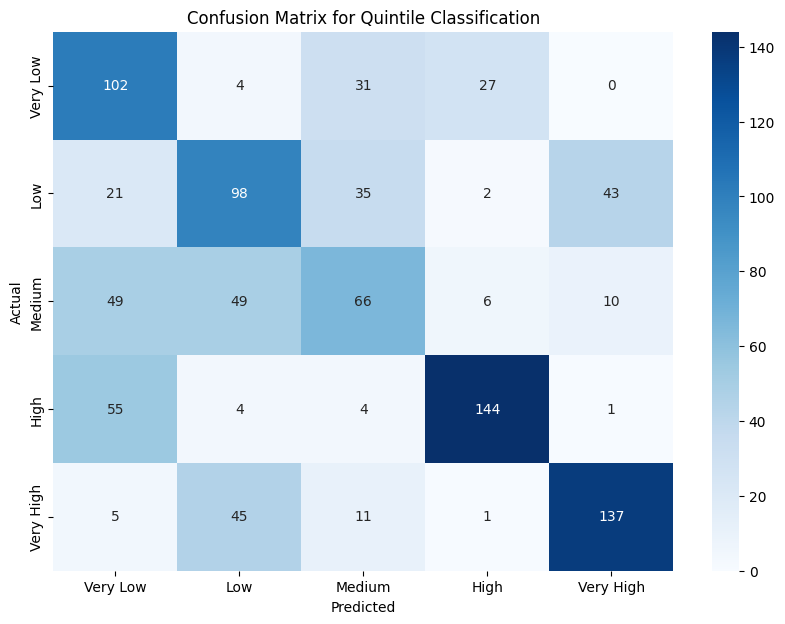

In [24]:
# 혼동 행렬 시각화
conf_matrix_quintile = confusion_matrix(y_test_q, predictions_quintile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_quintile, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], yticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Quintile Classification')
plt.show()